Steps followed:
    
    1. import the required libraries
    2. read and load the dataset and explore
    3. visualize the variables(univariate)
    4. prepare and Seperate the dataset for train, test split
    5. call the model followed by fit and predict
    6. plot the different results
    7. go with any of the metrics - (r2/ R-square  score choosen)

In [2]:
#importing Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
#reading the dataset
data = pd.read_csv('student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


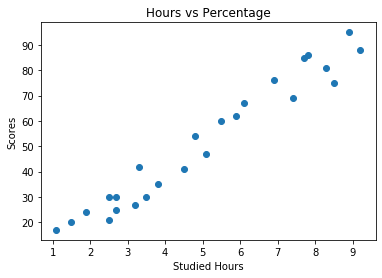

In [18]:
# Plotting Hours Vs Percentage of Scores
plt.scatter(data['Hours'], data['Scores'])
plt.title('Hours vs Percentage')
plt.xlabel('Studied Hours')
plt.ylabel('Scores')
plt.show()

In [19]:
# X will take all the values except the last column which is dependent variable
X = data.iloc[:, :-1].values 
y = data.iloc[:, -1].values
print('X: ',X)
print('y: ',y)

X:  [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
y:  [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [9]:
# Splitting train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 0)

In [20]:
# Training Linear Regression model on the training set
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

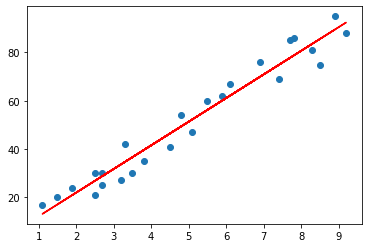

In [21]:
# Plotting the regression line
line = model.coef_*X + model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, color = 'red')
plt.show()

In [22]:
#Predicting the Test set results
y_pred = model.predict(X_test)
print(y_pred)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


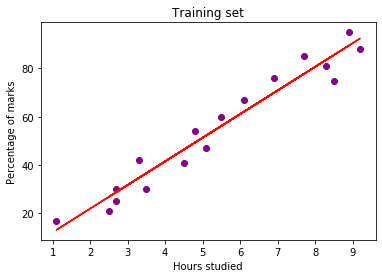

In [23]:
# Plotting the Training set results
plt.scatter(X_train, y_train, color = 'purple')
plt.plot(X_train, model.predict(X_train), color = 'red')
plt.title('Training set')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()

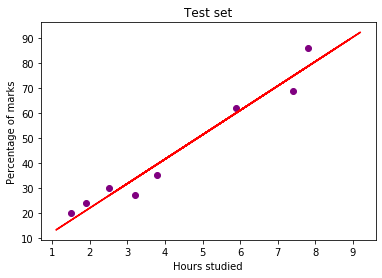

In [24]:
# Plotting the Test set results
plt.scatter(X_test, y_test, color = 'purple')
plt.plot(X_train, model.predict(X_train), color = 'red')
plt.title('Test set')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()

In [15]:
#Comparing the actual values with the predicted values
dataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(dataset)

   Actual  Predicted
0      20  17.053665
1      27  33.694229
2      69  74.806209
3      30  26.842232
4      62  60.123359
5      35  39.567369
6      24  20.969092
7      86  78.721636


In [25]:
# predicting the score
dataset = np.array(9.25)
dataset = np.reshape(dataset, (-1, 1))
pred = reg.predict(dataset)
print("If student studies 9.25 hours per day, the score will be {}.".format(pred))

If student studies 9.25 hours per day, the score will be [92.91505723].


In [26]:
# Computing Error Metrics 
from sklearn.metrics import r2_score
print('The R-Square of Model is: ', r2_score(y_test, y_pred))

The R-Square of Model is:  0.9568211104435257
